In [ ]:
  1 2 3 4 5
1 0 2 0 5 0
2 0 0 1 0 0
3 0 0 0 3 0
4 0 0 0 0 4
5 0 0 0 0 0
第一行表示从顶点1指向其他顶点的边的权重，
第二行表示从顶点2指向其他顶点的边的权重，
依此类推。例如，第1行第2列的元素为2，表示从顶点1指向顶点2的边的权重为2。


In [6]:
graph = dict()
graph['a'] = ['b', 'e']
graph['b'] = ['a', 'c', 'd']
graph['c'] = ['b', 'd']
graph['d'] = ['e', 'd', 'b', 'c']
graph['e'] = ['a', 'd']

class Vertex:

    def __init__(self, vertex_id):
        self.id = vertex_id
        self.adjacent = {}
        
    def __str__(self):
        return 'id: ' + str(self.id) + ', adjacent: ' + str([x.id for x in self.adjacent.values()])

    def add_neighbour(self, neighbour): #neighbour是aggregation
        self.adjacent[neighbour.id] = neighbour

    def get_connections(self):
        return list(self.adjacent.values() ) 

    def get_id(self):
        return self.id
    
    def get_edge_set(self):
        """
        Returns a set of vertex id's in an undirected graph as tuples
        like (v1, v2) for all edges in the graph.
        """
        edge_set = set()
        for neighbour in self.adjacent.values():
            if self.id <= neighbour.id:
                edge_set.add((self.id, neighbour.id))
        return edge_set
V1 = Vertex("a")
V2 = Vertex("b")
V3 = Vertex("c")

V1.add_neighbour(V2)
print(type(V1.get_connections()))
#dict.values() 返回的确实是一个值视图，而不是一个列表。它类似于列表，因为它可以被迭代，但是它不是一个列表对象，所以不支持列表的所有方法
# print(V1)
# V1.get_id()

class Graph:
    
    def __init__(self, vertices = []):
        self.vertex_dict = {}
        for vid in vertices:
            self.add_vertex(vid)
        
    def print_graph(self):
        for v in self.vertex_dict.values():
            print (v)

    def add_vertex(self, vertex_id):
        v = Vertex(vertex_id)
        self.vertex_dict[vertex_id] = v
        return v
    
    def get_vertex(self, vertex_id):
        return self.vertex_dict[vertex_id]

    def get_vertex_dict (self):
        return self.vertex_dict
    
    def add_edge (self, v1, v2):
        v1.add_neighbour (v2)
        v2.add_neighbour (v1)
    
    def get_edge_set(self):
        """
        Returns a set of vertex id's in an undirected graph as tuples
        like (v1, v2) for all edges in the graph.
        """
        edge_set = set()
        for v in self.vertex_dict.values():
            for edge in v.get_edge_set():
                print(edge)
                edge_set.add(edge)
        return edge_set
        
# 在无向图中，两个节点之间的连线被称为一条边，因此通过将一个节点添加为另一个节点的相邻节点，
# 相当于在这两个节点之间添加了一条无向边。在这个类中，
# add_neighbour方法实际上是将另一个节点作为当前节点的相邻节点添加到当前节点的相邻节点字典中，
# 也就是添加了一条从当前节点指向另一个节点的边。

# 至于Graph类，它的作用是将所有节点（Vertex对象）集合在一起，从而构成一个无向图。
# 它提供了方法来添加节点、添加边、获取节点等，从而可以方便地构建和操作图。
# 通过在Graph对象中保存所有节点，我们可以轻松地遍历整个图，并找到任意节点的相邻节点。

g = Graph()
va = g.add_vertex('a')
vb = g.add_vertex('b')
vc = g.add_vertex('c')
vd = g.add_vertex('d')
ve = g.add_vertex('e')

# Add isolated vertex
vf = g.add_vertex('f')

g.add_edge (va, vb)
g.add_edge (vb, vc)
g.add_edge (vc, vd)
g.add_edge (vb, vd)
g.add_edge (vd, vd)
g.add_edge (vd, ve)
g.add_edge (va, ve)

g.print_graph()
g.get_edge_set()

<class 'list'>
id: a, adjacent: ['b', 'e']
id: b, adjacent: ['a', 'c', 'd']
id: c, adjacent: ['b', 'd']
id: d, adjacent: ['c', 'b', 'd', 'e']
id: e, adjacent: ['d', 'a']
id: f, adjacent: []
('a', 'e')
('a', 'b')
('b', 'c')
('b', 'd')
('c', 'd')
('d', 'e')
('d', 'd')


{('a', 'b'),
 ('a', 'e'),
 ('b', 'c'),
 ('b', 'd'),
 ('c', 'd'),
 ('d', 'd'),
 ('d', 'e')}

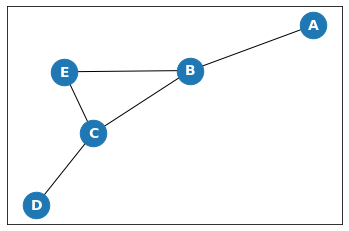

In [24]:
import networkx as nx

g = nx.Graph()
g.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
g.add_edges_from([('A', 'B'), ('B', 'E'), ('B', 'C'), ('E', 'C'), ('C', 'D')])
nx.draw_networkx(g, with_labels = True, font_color = 'white', \
                 font_weight = 'bold', font_size = 14, node_size = 700)

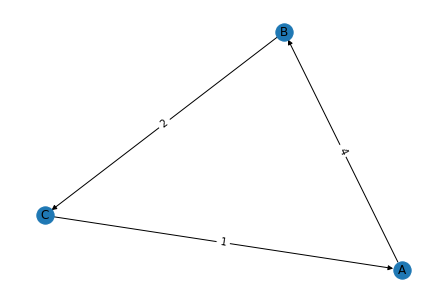

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_edge("A", "B", weight=4)
G.add_edge("B", "C", weight=2)
G.add_edge("C", "A", weight=1)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
